In [2]:
#Pytorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchsummary import summary

#Sci-kit learn
import sklearn.model_selection

#Numpy
import numpy as np

#Matplotlib
import matplotlib.pyplot as plt



# Part 1

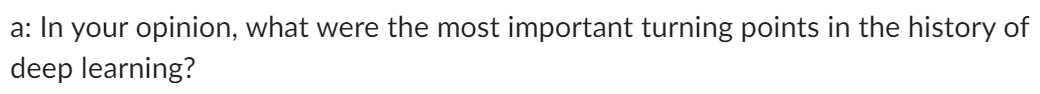

# a
 Question: In your opinion, what were the most important turning points in the history of deep learning

##### Answer:
The first turning point that essentially started the field of machine learning and deep learning was the invention of the perceptron by Rosenblatt in 1958. While this invention seems very separate from the very advanced implementation and construction of neural networks today, it has been the initial kickstart that led to our current deep learning progress. The perceptron was capable of classifying linearly separable variables, but only between in two classes outputting either 0 or 1.

The second important turning point happened when Paul Werbos proposed the usefulness of backpropagation in neural nets in 1974. The concept of backpropagation in neural networks allows a network to optimize the weights by backpropagating the error through the network and updating the weights each iteration. The lack of academic interest in neural networks meant that the backpropagation method was not popularized until a decade later in 1986. 

The third important turning point was caused by the invention of the Boltzmann Machines as a learning algorithm. A Boltzmann machine unlike the perceptron provides stochastic outputs, so a neural network could provide its confidence of an input belonging to each class, and the sum of all these probabilities will sum to 1.

The fourth important turning point occured in 1989. Combining backpropagation and Boltzmann Machines, LeCun et al. created a neural network capable of recognizing handwritten zip-codes. This not only proved the usefulnes of backpropagation, but also showed a new method that would be useful for all further deep learning applications, the convolution neural net (CNN).

The fifth important turning point was the invention of the recurrent neural network (RNN) since it allowed neural networks to recognize time-dependent data such as speech. This method used error backpropagation through time and allowed for neurons to reccurently output into nodes further back in the network or even back into their own input.

The sixth important turning point was the creation of big datasets, such as the WordNET dataset in 2009 and the ImageNET dataset, which allowed for benchmarking and efficient training.

The seventh important turning point was the realization that the ReLU activation function was in most cases the best performer i deep neural networks, and that the random initialization of weights was not optimal, but their layer placement in the neural network should be considered.

The eight important turning point was the invention of dropout, a method useful for preventing overfitting and preventing co-adaptation of feature detectors. This method massively improved the testing accuracy on the ImageNet dataset.

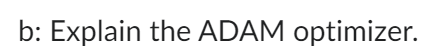

ADAM is a learning algorithm. In deep learning it is known as one of the most robust and effective optimization algorithms. It utilizes stochastic gradient descent, which is computationally efficient because we only need $\mathcal{O}$(1) computations each rather than the $\mathcal{O}$(n) (n being the number of traing data examples) computations needed for regular gradient descent for each independent variable iteration. The stochastic gradient is an ubiased estimator which acts on average as a good estimate of the gradient, so it is both accurate enough and much more computationally efficient. To further improve upon the stochastic gradient descent, ADAM draws inspiration from two other stochastic gradient descent extensions, AdaGrad and RMSProp. ADAM makes use of both the average first moment as used in AdaGrad and also the average of the second moments of the gradients as in RMSProp. It specifucally calculates the biased first moment and the biased second raw moment from the gradients, using $\beta_1$ and $\beta_2$ to control their decay rates. It then computes the bias-corrected moment estimates because initialization bias can cause discrepancy between the expected value of the exponential moving averages and the true second moment. This is corrected by dividing the biased moment estimates with $(1-\beta^t_1)$ and $(1-\beta^t_2)$ respectively. 

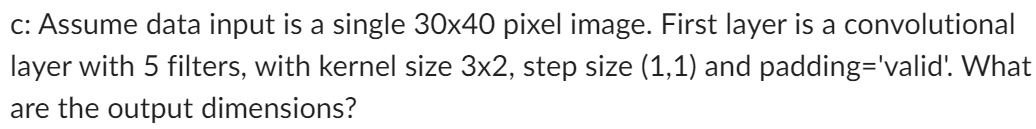

#### Answer:
The input as described is a single input with a single channel of a 30x40 image. The input dimension are thus in tensor form $shape_{in}=(1,1,30,40)$. The input is fed through a convolutional layer with 5 filters, producing 5 output channels for our image, and the kernel size is 3x2 with step size 1,1 and valid padding. Valid padding means no padding is applied to the image, so in this case the output image will be smaller in both dimension due to the kernel size 3x2. The output image will have dimension 28,39 as the odd size of the first dimension of the kernel will remove one pixel from each side of the image, and the even size of the second dimension of the kernel will remove only one pixel in total.
The output shape will then be $shape_{out}=(1,5,28,39)$

To futher prove this point the convolutional layer is applied to a random input of the provided shape, and the output tensor shape will be provided

In [10]:
m = nn.Conv2d(in_channels=1,out_channels=5,kernel_size=(3,2),stride=(1,1),padding='valid')
X = torch.randn(1,1,30,40)
out = m(X)
print(out.shape)

torch.Size([1, 5, 28, 39])


It is evident here that the output shape is indeed $shape_{out}=(1,5,28,39)$

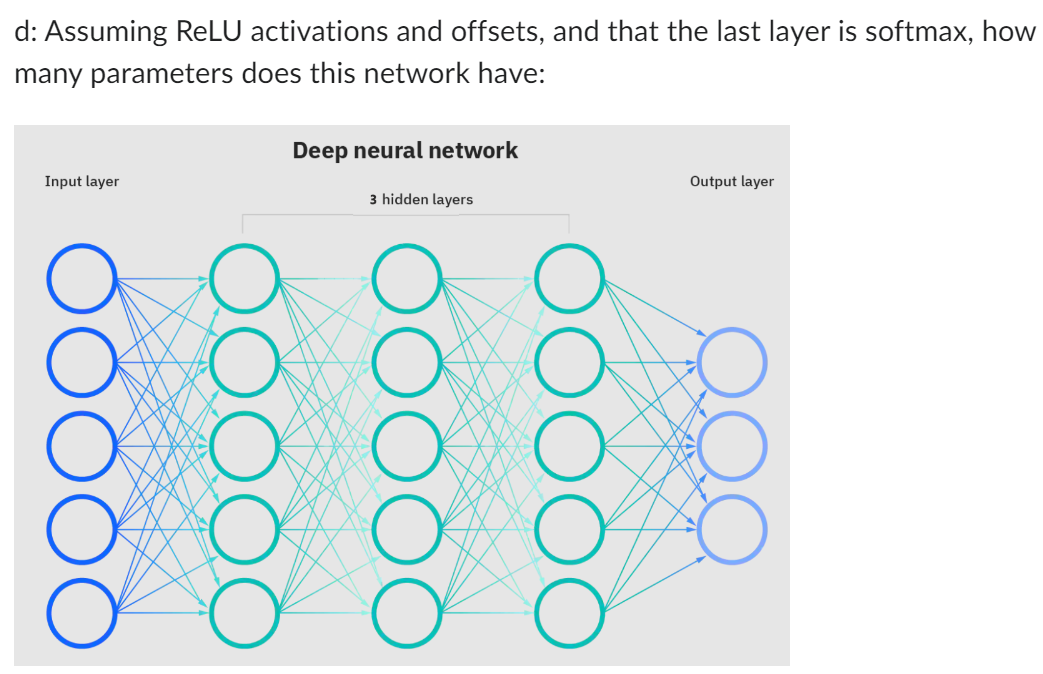

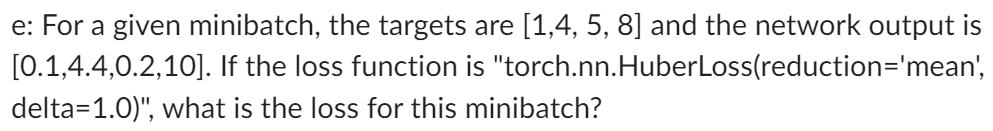

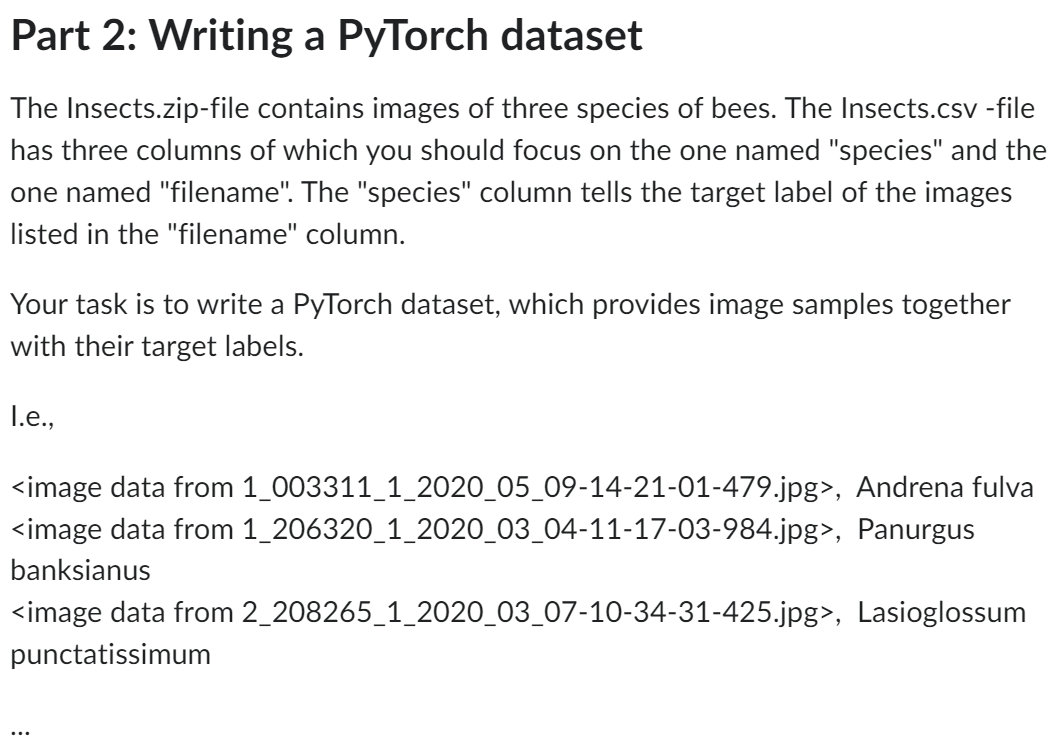
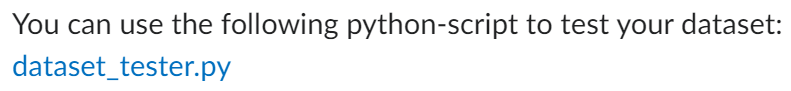


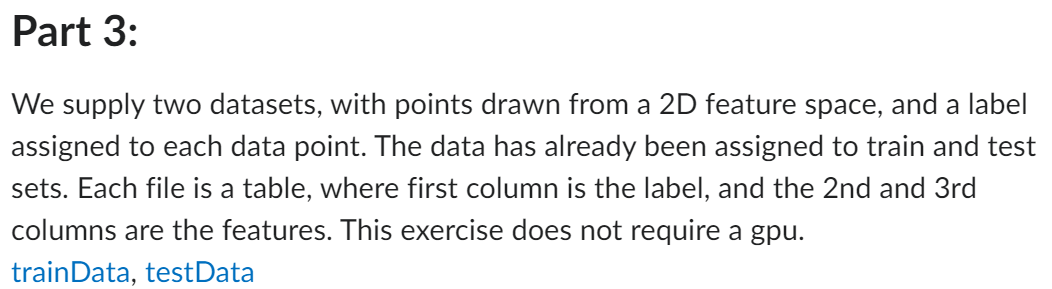

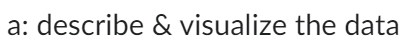

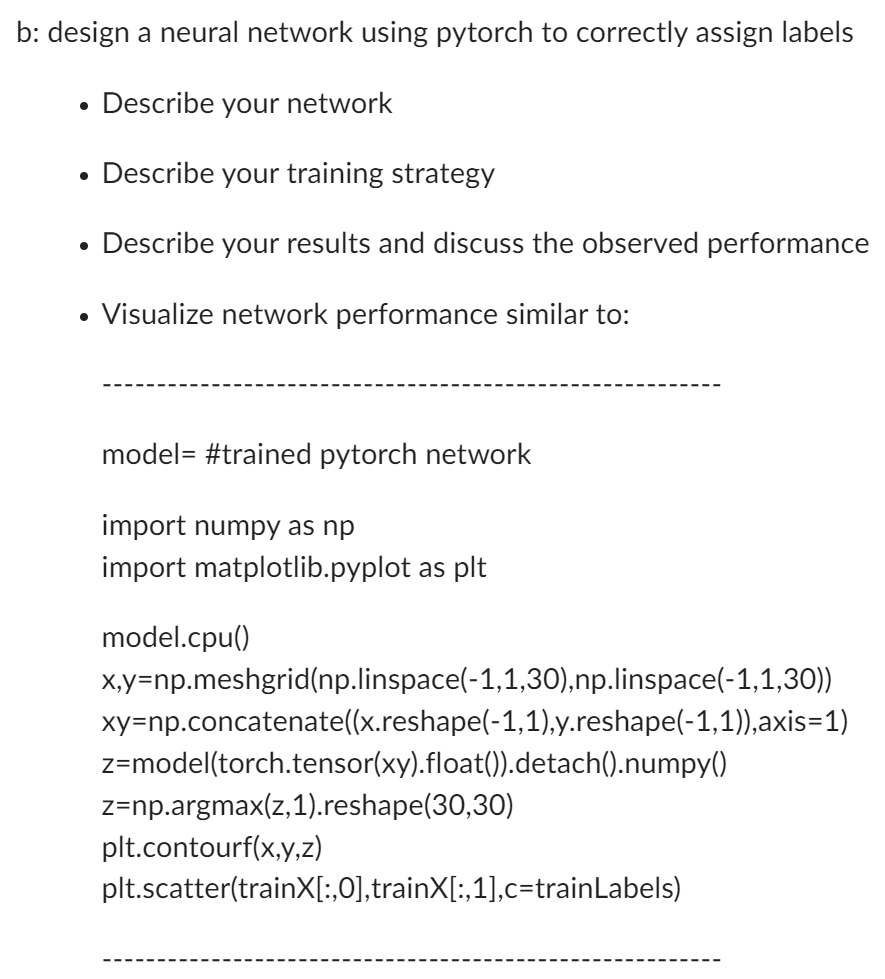